<a href="https://colab.research.google.com/github/AmirMansurian/Epipolar-Geometry/blob/main/Ransac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import cv2
from sklearn.metrics import mean_squared_error
import scipy.io
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [53]:
#Draw the provided lines on the image
def drawlines(img1,img2,lines,pts1,pts2, clr=0):
    r, c = img1.shape[:2]
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    color = tuple([255, 0, 0])
    if clr == 1 :
      color = tuple([0, 255, 0])
    elif clr == 2:
      color = tuple([0, 0, 255])

    for r, pt1, pt2 in zip(lines,pts1,pts2):
        #color = tuple(np.random.randint(0,255,3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1] ])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 8)
        img1 = cv2.circle(img1, tuple(pt1), 5, tuple([255, 255, 255]), thickness = 30)
        img2 = cv2.circle(img2, tuple(pt2), 5, tuple([255, 255, 255]), thickness = 30)
    return img1,img2

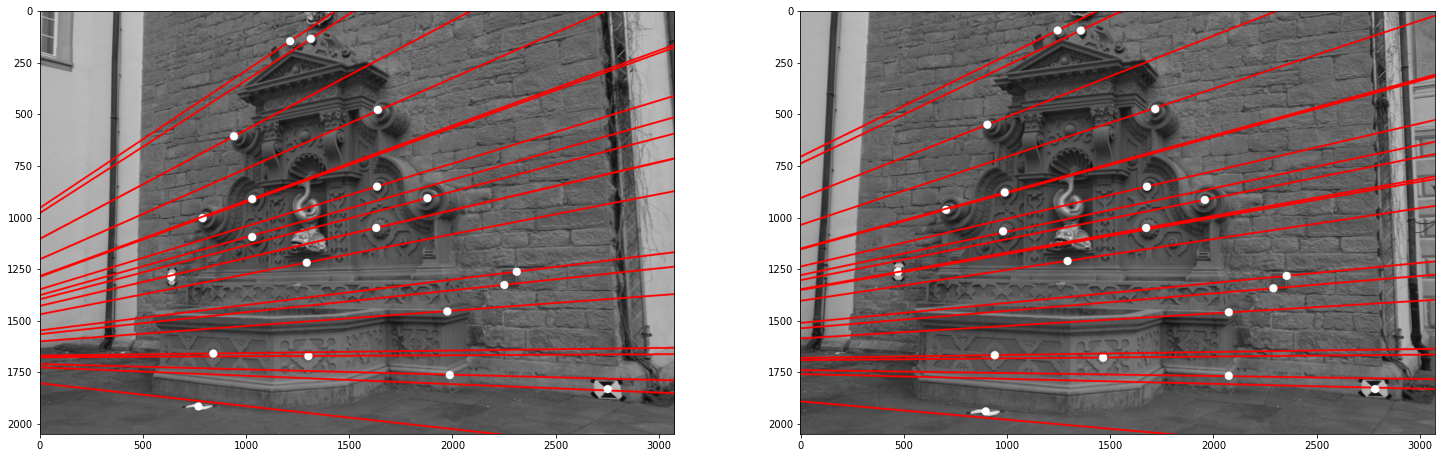

In [61]:
image1 = cv2.imread('img1.png', 0)
image2 = cv2.imread('img2.png', 0)
mat = scipy.io.loadmat('points_inliers.mat')
points1 = np.int32(mat['X1'])
points2 = np.int32(mat['X2'])

F_inlier, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_LMEDS)

# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(points2.reshape(-1,1,2), 2, F_inlier)
lines1 = lines1.reshape(-1,3)
img1,img12 = drawlines(image1,image2,lines1,points1,points2, 0)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(points1.reshape(-1,1,2), 1, F_inlier)
lines2 = lines2.reshape(-1,3)
img2,img13 = drawlines(image2,image1,lines2,points2,points1, 0)

figure(figsize=(25, 25))
plt.subplot(121),plt.imshow(img1)
plt.subplot(122),plt.imshow(img2)
plt.show()

In [62]:
import math

G = 0.5   #proportion of inliers in inputs
P = 8     #model need of pairs (8 for 8 point algorithm)
success_prob = 0.99 #probability of success of ransac
N = math.ceil(math.log(1-success_prob)/(math.log(1-G**P)))  #Number Iteration needed

print('__________________________________________________________________')
print(f'Number of Iteration needed for success probability {int(success_prob*100)}% : {N}')
print('__________________________________________________________________')

__________________________________________________________________
Number of Iteration needed for success probability 99% : 1177
__________________________________________________________________


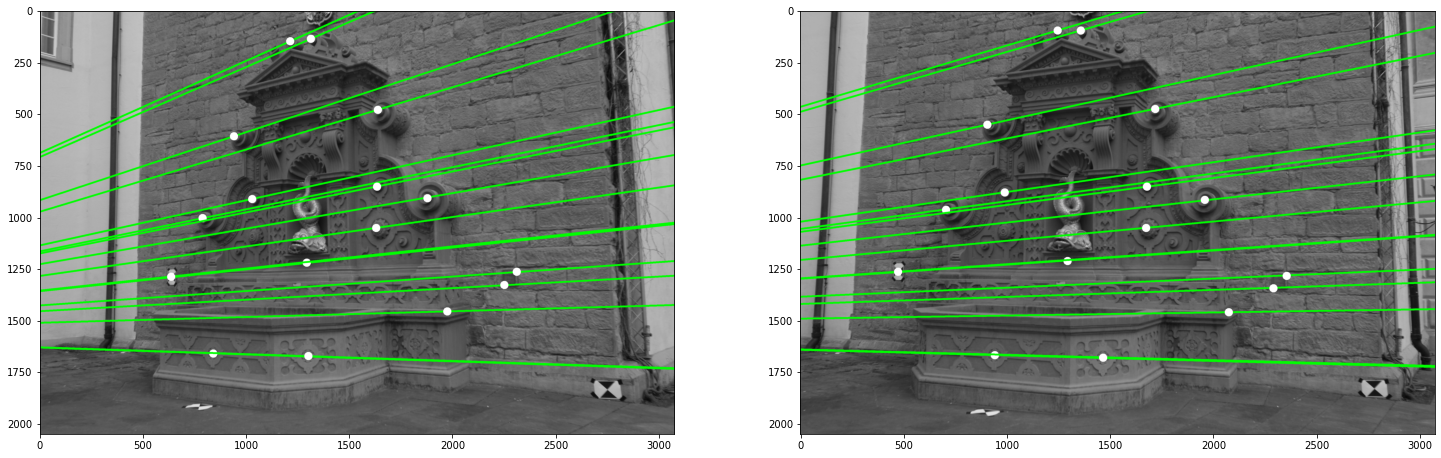

In [73]:
mat = scipy.io.loadmat('points.mat')
points1 = np.int32(mat['X1'])
points2 = np.int32(mat['X2'])

F_ransac, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_RANSAC)

index, idx= np.where(mask == 1)
points1 =points1[index]
points2 =points2[index]


# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines11 = cv2.computeCorrespondEpilines(points2.reshape(-1,1,2), 2, F_ransac)
lines11 = lines11.reshape(-1,3)
img3,img = drawlines(image1,image2,lines11,points1,points2, 1)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines22 = cv2.computeCorrespondEpilines(points1.reshape(-1,1,2), 1, F_ransac)
lines22 = lines22.reshape(-1,3)
img4,img = drawlines(image2,image1,lines22,points2,points1, 1)

figure(figsize=(25, 25))
plt.subplot(121),plt.imshow(img3)
plt.subplot(122),plt.imshow(img4)
plt.show()

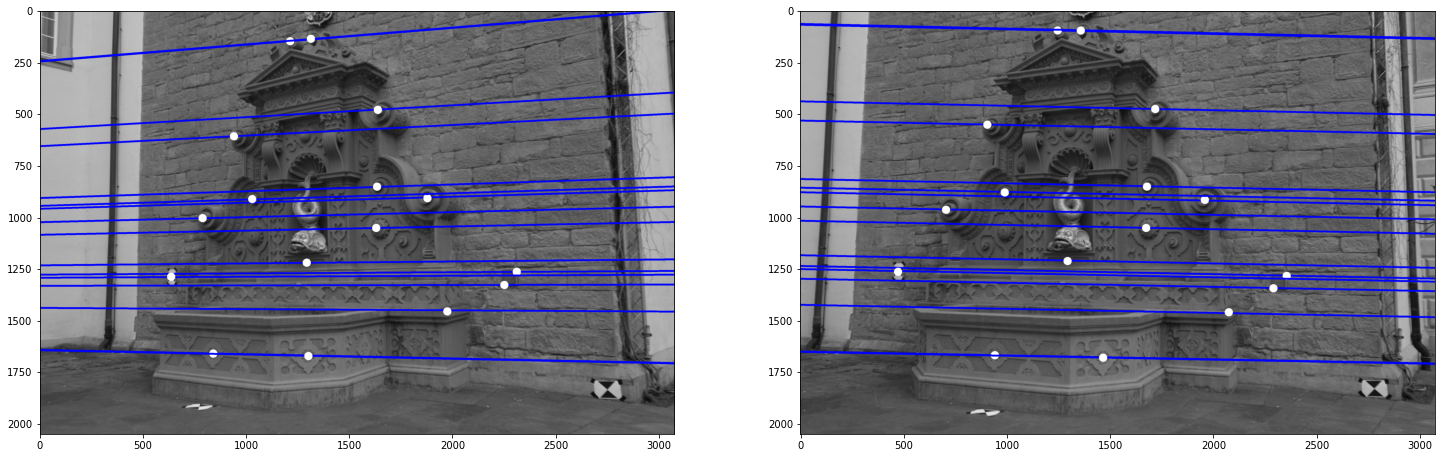

In [74]:
from sklearn.metrics import mean_squared_error

mat = scipy.io.loadmat('info.mat')
F_real = mat['F']

# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines111 = cv2.computeCorrespondEpilines(points2.reshape(-1,1,2), 2, F_real)
lines111 = lines111.reshape(-1,3)
img5,img = drawlines(image1,image2,lines111,points1,points2, 2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines222 = cv2.computeCorrespondEpilines(points1.reshape(-1,1,2), 1, F_real)
lines222 = lines222.reshape(-1,3)
img6,img = drawlines(image2,image1,lines222,points2,points1, 2)

figure(figsize=(25, 25))
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img6)
plt.show()

__________________________________________________________________
fundamental matrix with inlier points:
 [[ 8.79147769e-09 -1.25025302e-06  2.11189675e-03]
 [ 1.67040169e-06 -6.41336490e-08  1.93294583e-03]
 [-2.83646639e-03 -2.43781353e-03  1.00000000e+00]] 
 
 fundamental matrix with ransac:
 [[-5.33469372e-09 -9.00397534e-07  1.39766911e-03]
 [ 1.32411869e-06 -2.17839853e-08  2.63545311e-03]
 [-2.06281421e-03 -3.23075197e-03  1.00000000e+00]] 
 
 Real fundamental matrix : 
 [[-6.80998063e-09  1.18173885e-08 -1.08932371e-04]
 [ 3.47852883e-07 -3.40933672e-09  4.74923600e-03]
 [-4.61831877e-04 -5.37556235e-03  1.00000000e+00]]
__________________________________________________________________

 MSE of F_real and F_inlier = 3.014759208114725e-06
__________________________________________________________________

 MSE of F_real and F_ransac = 1.5445870994387829e-06
__________________________________________________________________


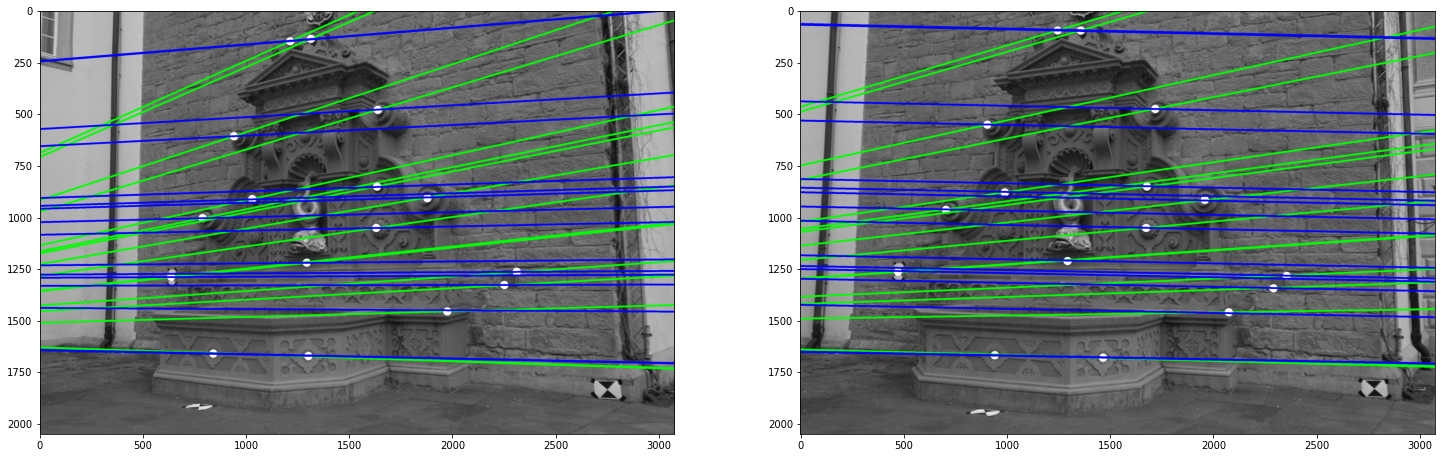

In [78]:
print('__________________________________________________________________')
print('fundamental matrix with inlier points:\n', F_inlier, '\n \n', 'fundamental matrix with ransac:\n', F_ransac, '\n \n', 'Real fundamental matrix : \n', F_real)
print('__________________________________________________________________')
print(f'\n MSE of F_real and F_inlier = {mean_squared_error(F_real,F_inlier) }')
print('__________________________________________________________________')
print(f'\n MSE of F_real and F_ransac = {mean_squared_error(F_real,F_ransac) }')
print('__________________________________________________________________')

r, c = img1.shape[:2]
comp1 = img3
comp2 = img4

for r in lines111:
    color = tuple([0, 0, 255])
    x0, y0 = map(int, [0, -r[2]/r[1] ])
    x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
    comp1 = cv2.line(comp1, (x0, y0), (x1, y1), color, 8)

for r in lines222:
    color = tuple([0, 0, 255])
    x0, y0 = map(int, [0, -r[2]/r[1] ])
    x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
    comp2 = cv2.line(comp2, (x0, y0), (x1, y1), color, 8)

figure(figsize=(25, 25))
plt.subplot(121),plt.imshow(comp1)
plt.subplot(122),plt.imshow(comp2)
plt.show()